# 08 — Using Simple Linear Regression as a Python Class

In this notebook, we:
- Encapsulate all logic into a Python class
- Implement `fit()` using vectorized gradient descent
- Create a clean interface with `fit()` and `predict()`
- Reuse this model like any real-world ML library

## Step 1: Import Libraries

We're using:
- NumPy for computation
- Matplotlib + Seaborn for plotting

In [12]:
# ✅ Step 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 3)

## Step 2: Define `SimpleLinearRegression` Class

This class includes:
- `__init__` → Initialize hyperparameters
- `fit` → Gradient descent (vectorized)
- `predict` → Makes predictions
- `plot_cost` → Shows learning curve
- `get_params()` — to retrieve slope and intercept from `theta`

In [13]:
# ✅ Step 2: Define the Class
class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        X = X.reshape(-1, 1)
        y = y.reshape(-1, 1)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        n = X_b.shape[0]
        self.theta = np.zeros((2, 1))

        for _ in range(self.n_iterations):
            y_pred = X_b @ self.theta
            error = y_pred - y
            cost = (1/n) * np.sum(error**2)
            self.cost_history.append(cost)

            gradients = (2/n) * X_b.T @ error
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        X = X.reshape(-1, 1)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

    def get_params(self):
        if self.theta is not None:
            intercept = self.theta[0][0]
            slope = self.theta[1][0]
            return {'intercept': intercept, 'slope': slope}
        else:
            raise ValueError("Model is not trained yet. Fit the model first.")

    def plot_cost(self):
        plt.plot(range(self.n_iterations), self.cost_history, color="purple")
        plt.title("Cost Function Over Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("MSE")
        plt.show()

## Step 3: Generate Sample Data

We simulate a linear relationship:


y = 2.5x + 6 + noise

We manually created the sample data using a known slope and intercept (slope = 2.5, intercept = 6) before training the model.




In [14]:
# ✅ Step 3: Generate Sample Data
np.random.seed(42)
X = np.linspace(0, 10, 50)
noise = np.random.normal(0, 2, X.shape)
y = 2.5 * X + 6 + noise

## Step 4: Fit the Model

We train the custom linear regression model using gradient descent.

In [15]:
# ✅ Step 4: Train the Model
model = SimpleLinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X, y)

## Step 5: Predictions

We use the trained model to predict `y` values.

In [16]:
# ✅ Step 5: Make Predictions
y_pred = model.predict(X)

## Step 6: Get Model Parameters

The slope and intercept learned by the model are:
- Intercept: `θ₀`
- Slope: `θ₁`

In [17]:
# ✅ Step 6: Get Learned Parameters
params = model.get_params()
print(f"Intercept: {params['intercept']:.4f}")
print(f"Slope:     {params['slope']:.4f}")

Intercept: 6.0928
Slope:     2.3894


## Step 7: Visualize Model Fit

We compare actual data vs predictions using the learned regression line.

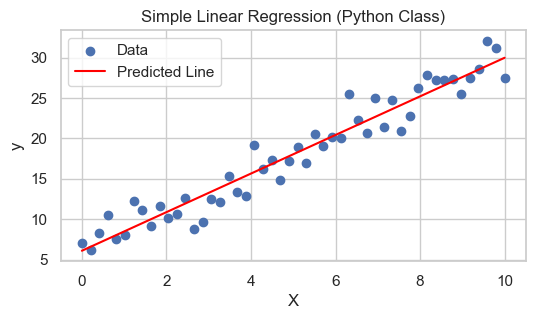

{'intercept': np.float64(6.0927833866542604), 'slope': np.float64(2.389434336123587)}


In [23]:
# ✅ Step 7: Plot Results
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Predicted Line")
plt.title("Simple Linear Regression (Python Class)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

params = model.get_params()
print(params)

## Step 8: Cost Convergence

This shows how the Mean Squared Error reduces over each iteration of gradient descent.

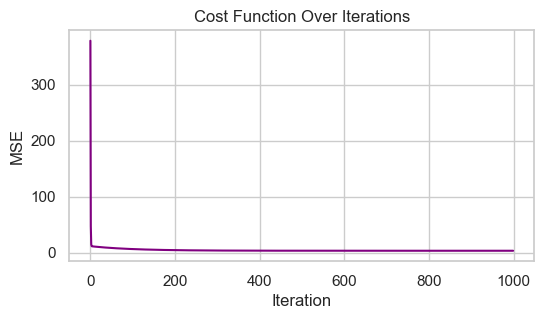

In [19]:
# ✅ Step 8: Plot Cost Function
model.plot_cost()